In [3]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [4]:
SEED = 42

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
data_size = 6517
data = pd.read_csv(f"data/processed_data/clean_data_{data_size}.csv")

In [7]:
data.head()

,price,city,state,usable_areas,total_areas,parking_spaces,suites,bathrooms,bedrooms,price_cat
0,850000,Rio de Janeiro,Rio de Janeiro,320,320,4,0,3,4,2
1,680000,São Paulo,São Paulo,140,150,2,1,3,3,2
2,590000,Campo Grande,Mato Grosso do Sul,120,254,2,1,2,3,2
3,300000,Piracicaba,São Paulo,400,400,4,4,5,4,1
4,380000,São José dos Campos,São Paulo,140,140,3,1,2,3,1


In [8]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=["city", "state", "price", "price_cat"]),
    data["price_cat"],
    test_size=0.2,
    random_state=SEED,
)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

models = [
    LogisticRegression(),
    # SVC(),
    # XGBClassifier(),
    MLPClassifier(),
    # RandomForestClassifier(),
    # KNeighborsClassifier(),
]

params = {
    type(LogisticRegression()).__name__: {
        "penalty": ["l1", "l2"],
        "C": [0.1, 1, 10],
        "solver": ["liblinear"],
    },
    type(SVC()).__name__: {
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "degree": [2, 3, 4],
        "C": [0.1, 1],
    },
    type(XGBClassifier()).__name__: {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 4, 5, 6, 7],
        "learning_rate": [0.01, 0.05, 0.1],
        "gamma": [0, 0.25, 1.0],
    },
    type(MLPClassifier()).__name__: {
        "hidden_layer_sizes": [(5, 3), (14, 7, 3), (140, 140, 140)],
        "activation": ["relu"],
        "early_stopping": [True],
    },
    type(RandomForestClassifier()).__name__: {
        "n_estimators": [10, 50, 100, 200],
        "max_depth": [None, 5, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": ["sqrt", "log2"],
    },
    type(KNeighborsClassifier()).__name__: {
        "n_neighbors": [3, 5, 10],
        "weights": ["uniform", "distance"],
        "algorithm": ["auto", "ball_tree", "kd_tree"],
    },
}

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from tqdm.auto import tqdm

# Perform cross-validation for each model
for model in tqdm(models, desc="Training"):
    print("Training %s\n" % type(model).__name__)
    model_name = type(model).__name__
    model_params = params[model_name]

    # Create GridSearchCV instance
    grid_search = GridSearchCV(estimator=model, param_grid=model_params, cv=5)

    # Fit the model and perform cross-validation
    grid_search.fit(X_train, y_train)

    # Get the best parameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Calculate predictions
    y_pred = grid_search.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Best parameters for {model_name}: {best_params}")
    print(f"Best score for {model_name}: {best_score}")
    print(f"Accuracy for {model_name}: {accuracy}")

Training:   0%|          | 0/2 [00:00<?, ?it/s]

Training LogisticRegression



Training:  50%|█████     | 1/2 [00:01<00:01,  1.18s/it]

Best parameters for LogisticRegression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score for LogisticRegression: 0.6121318800227455
Accuracy for LogisticRegression: 0.6134969325153374
Training MLPClassifier



Training: 100%|██████████| 2/2 [00:17<00:00,  8.84s/it]

Best parameters for MLPClassifier: {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': (140, 140, 140)}
Best score for MLPClassifier: 0.565701146294739
Accuracy for MLPClassifier: 0.5912576687116564


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix


def classifier_metrics(model, X_train, y_train, X_test, y_test):
    # fit model to training data
    model.fit(X_train, y_train)

    # get predicted y values for train and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # calculate accuracy scores for train and test data
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # calculate confusion matrices for train and test data
    train_cm = confusion_matrix(y_train, y_train_pred)
    test_cm = confusion_matrix(y_test, y_test_pred)

    # plot confusion matrices
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    sns.heatmap(train_cm, ax=axs[0], annot=True, cmap="Blues", fmt="g")
    axs[0].set_title("Train Confusion Matrix")
    axs[0].set_xlabel("Predicted Labels")
    axs[0].set_ylabel("True Labels")
    sns.heatmap(test_cm, ax=axs[1], annot=True, cmap="Blues", fmt="g")
    axs[1].set_title("Test Confusion Matrix")
    axs[1].set_xlabel("Predicted Labels")
    axs[1].set_ylabel("True Labels")
    plt.show()

    # print train and test accuracy
    print("Train Accuracy:", round(train_acc, 3))
    print("Test Accuracy:", round(test_acc, 3))

### Logistic regression

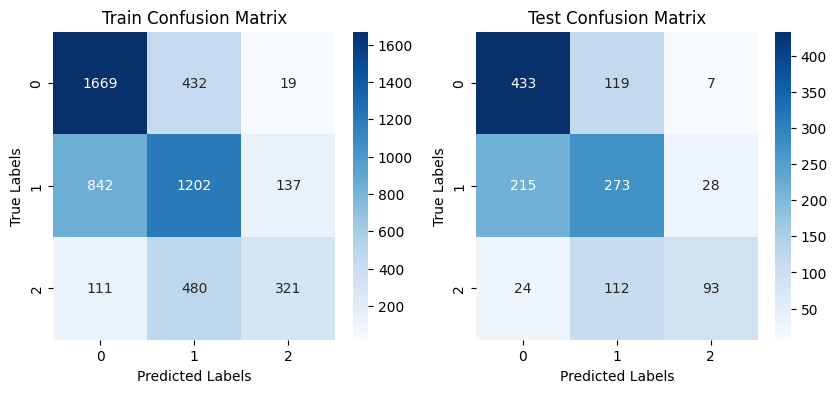

Train Accuracy: 0.612
Test Accuracy: 0.613


In [45]:
params = {"C": 0.1, "penalty": "l1", "solver": "liblinear"}
model = LogisticRegression(**params)
model.fit(X_train, y_train)
classifier_metrics(model, X_train, y_train, X_test, y_test)

### MLP Classifier

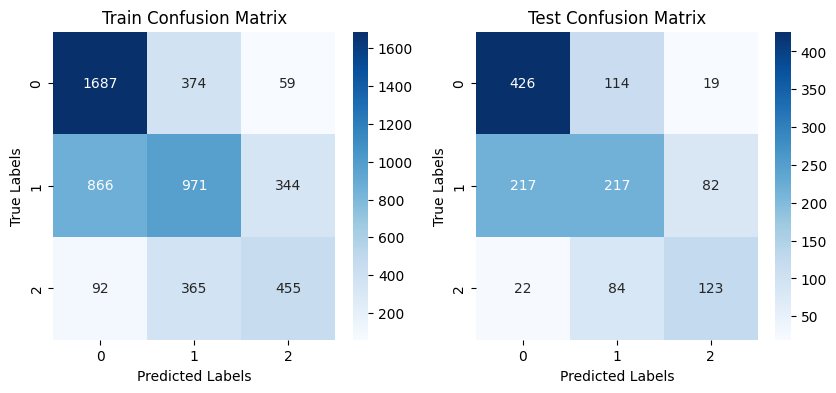

Train Accuracy: 0.597
Test Accuracy: 0.587


In [47]:
params = {
    "activation": "relu",
    "early_stopping": True,
    "hidden_layer_sizes": (140, 140, 140),
}
model = MLPClassifier(**params)
model.fit(X_train, y_train)
classifier_metrics(model, X_train, y_train, X_test, y_test)

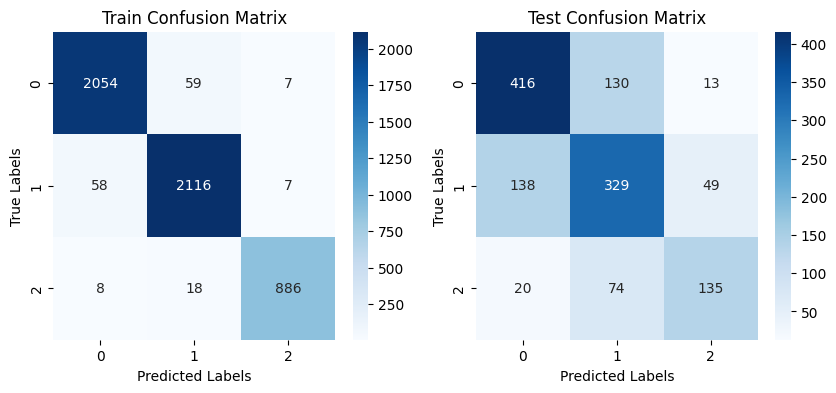

Train Accuracy: 0.97
Test Accuracy: 0.675


In [48]:
params = {}
model = RandomForestClassifier(**params)
model.fit(X_train, y_train)
classifier_metrics(model, X_train, y_train, X_test, y_test)

In [29]:
label = model.predict(X_train.iloc[1].values.reshape(1, -1))

label

/home/gabriel/Documents/ufc/ciencia de dados/house_price/venv/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([1])

In [12]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
# Generate prediction
y_pred = neigh.predict(X_test)

# evaluate model
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6702453987730062

In [14]:
y_test.value_counts()

price_cat
1    559
2    516
3    229
Name: count, dtype: int64

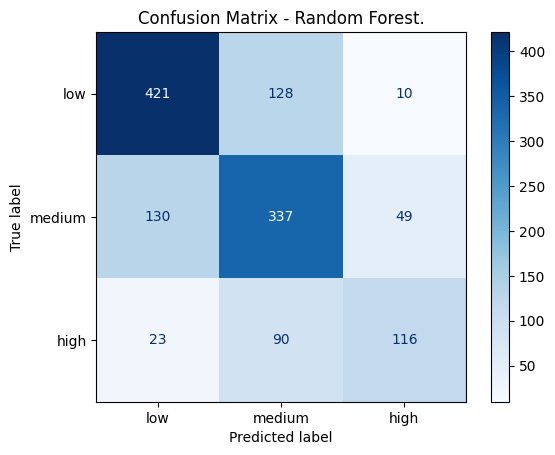

Summary for the classifier Random Forest with accuracy 0.67
              precision    recall  f1-score   support

           1       0.73      0.75      0.74       559
           2       0.61      0.65      0.63       516
           3       0.66      0.51      0.57       229

    accuracy                           0.67      1304
   macro avg       0.67      0.64      0.65      1304
weighted avg       0.67      0.67      0.67      1304



In [15]:
# Confusion Matrix ========================================
from sklearn import metrics
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["low", "medium", "high"]
)
disp.plot(cmap=plt.cm.Blues, xticks_rotation="horizontal")
plt.title(f"Confusion Matrix - Random Forest.")
plt.show()

# metrics =================================================
print(
    f"Summary for the classifier Random Forest with accuracy {metrics.accuracy_score(y_test, y_pred):.2f}"
)
print(metrics.classification_report(y_test, y_pred))

In [16]:
# Do a regression logist models for 3 labels
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

/home/gabriel/Documents/ufc/ciencia de dados/house_price/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


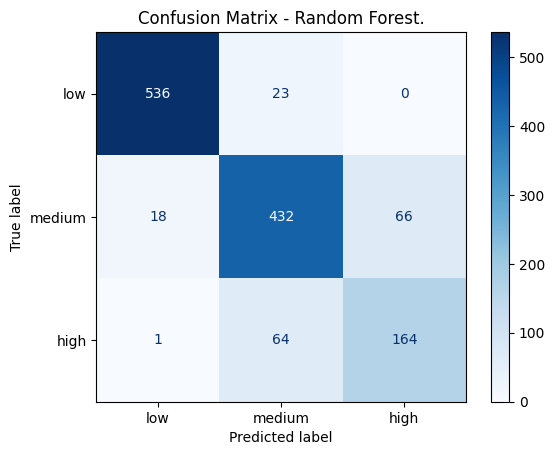

Summary for the classifier Random Forest with accuracy 0.87
              precision    recall  f1-score   support

           1       0.97      0.96      0.96       559
           2       0.83      0.84      0.83       516
           3       0.71      0.72      0.71       229

    accuracy                           0.87      1304
   macro avg       0.84      0.84      0.84      1304
weighted avg       0.87      0.87      0.87      1304



In [17]:
# Confusion Matrix ========================================
from sklearn import metrics
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["low", "medium", "high"]
)
disp.plot(cmap=plt.cm.Blues, xticks_rotation="horizontal")
plt.title(f"Confusion Matrix - Random Forest.")
plt.show()

# metrics =================================================
print(
    f"Summary for the classifier Random Forest with accuracy {metrics.accuracy_score(y_test, y_pred):.2f}"
)
print(metrics.classification_report(y_test, y_pred))